<a href="https://colab.research.google.com/github/JoshLindocdata/Rprogramming/blob/main/yasa_Quickstart_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#參考網站：
1.   yasa Quickstart: https://raphaelvallat.com/yasa/build/html/quickstart.html
2.  yasa slow wave detection: https://github.com/raphaelvallat/yasa/blob/master/notebooks/05_sw_detection.ipynb

code by Josh Lin 2023/4/23

In [2]:
!git remote add origin git@github.com:JoshLindocdata/HRV-SW-project.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [ ]:
!pip install mne
!pip install --upgrade yasa
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 41.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 13.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.6/423.6 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 5.5 MB/s eta 0:00:00
  Preparin

用yasa的方法導入資料，使用mne套件，輸入的是一個raw的資料格式，是一種numpy

In [ ]:
import mne

In [ ]:
raw=mne.io.read_raw_edf("/content/drive/Shareddrives/AIM_research_data/data/S0190520    方念陸/ec707004-c345-4725-bb7d-803460fcc4b9/Traces.edf", preload=True)

Extracting EDF parameters from /content/drive/Shareddrives/AIM_research_data/data/S0190520    方念陸/ec707004-c345-4725-bb7d-803460fcc4b9/Traces.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4356999  =      0.000 ... 21784.995 secs...


In [ ]:
raw

<RawEDF | Traces.edf, 36 x 4357000 (21785.0 s), ~1.17 GB, data loaded>

In [ ]:
chan=raw.ch_names
chan

['Light',
 'Position',
 'Activity',
 'Elevation',
 'Flow_DR',
 'Nasal Pressure',
 'Derived Snore',
 'Mask Pressure',
 'Audio Level',
 'Gravity X',
 'Gravity Y',
 'Gravity Z',
 'Thorax',
 'Abdomen',
 'Thermistor',
 'SpO2',
 'Pulse',
 'SpO2 Quality',
 'RD-Quality',
 'Pleth',
 'F3',
 'C3',
 'O1',
 'F4',
 'C4',
 'O2',
 'E1',
 'E2',
 'M1',
 'M2',
 'ChinC',
 'ChinL',
 'ChinR',
 'EKG',
 'LegL',
 'LegR']

檢查frequency，和我們的資料不一致，我們的應該是200Hz，可以用resample修正也可以不要，網站上是說會比較快

In [ ]:
print(raw.info['sfreq'])

200.0


In [ ]:
#raw.resample(250)

ChatGPT說額葉導極（F3,F4）和中央導極（C3,C4）最容易檢測到slow wave

In [ ]:
raw_pick=raw.pick_channels(['F4'])

In [ ]:
raw_pick

<RawEDF | Traces.edf, 1 x 4357000 (21785.0 s), ~33.2 MB, data loaded>

切出一段時間，因為這個病人的Slow wave真的太少太難找，利用hypopred抓到N3的時間，抓個100秒才好不容易抓到

In [ ]:
raw_crop = raw.copy().crop(tmin=18000, tmax=18100)

In [ ]:
test=raw_pick

重要步驟，要把data拿出來，這種格式都需要這個步驟，但是平常抓sw等，用raw就可以了

In [ ]:
data=test.get_data()

In [ ]:
data=data.astype(np.float64)

畫出基本的圖形

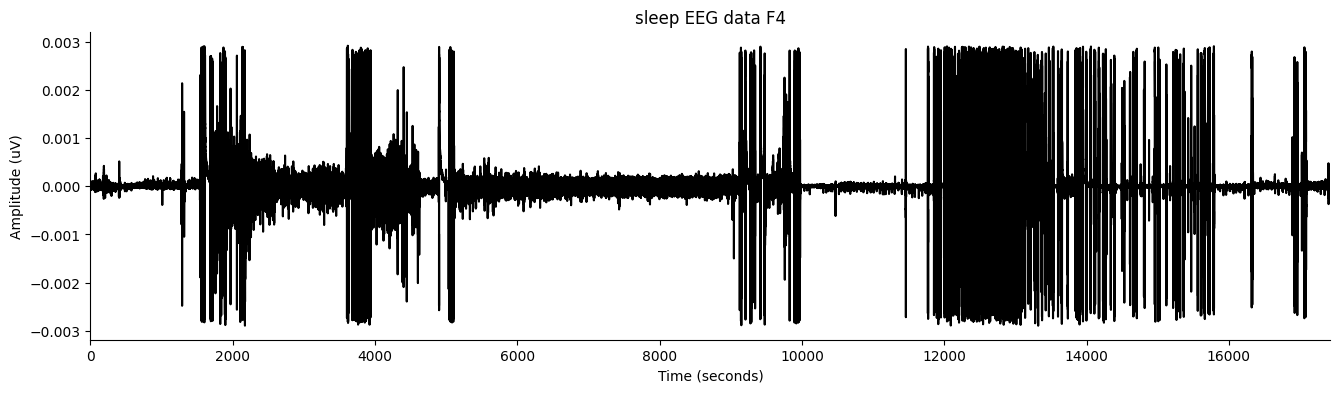

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Define sampling frequency and time vector
sf = 200.
times = np.arange(data.size) / sf

data_channel_1 = data[0]
data_channel_1_flattened = data_channel_1.ravel()

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
plt.plot(times, data_channel_1_flattened, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.xlim([times.min(), times.max()])
plt.title('sleep EEG data F4')
sns.despine()


slow wave detection!

In [ ]:
import yasa
sw = yasa.sw_detect(raw_pick)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [ ]:
sw.summary(grp_chan=True, aggfunc='mean')

,Count,Duration,ValNegPeak,ValPosPeak,PTP,Slope,Frequency
Channel,,,,,,,
F4,2487,1.175553,-88.676256,62.592425,151.268681,555.730059,0.937473


In [ ]:
events = sw.summary()
events.round(2)

,Start,NegPeak,MidCrossing,PosPeak,End,Duration,ValNegPeak,ValPosPeak,PTP,Slope,Frequency,Channel,IdxChannel
0,78.77,79.54,79.81,80.02,80.22,1.46,-47.24,33.29,80.53,303.88,0.69,F4,0
1,92.46,93.02,93.54,93.84,94.16,1.70,-83.65,81.94,165.59,315.41,0.59,F4,0
2,95.36,95.80,96.44,96.76,97.33,1.97,-71.65,57.20,128.85,199.76,0.51,F4,0
3,234.74,235.06,235.70,235.92,236.08,1.34,-163.84,85.88,249.71,390.18,0.74,F4,0
4,237.32,237.62,237.90,238.05,238.24,0.92,-167.94,51.68,219.63,784.38,1.08,F4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482,21342.27,21342.45,21342.62,21342.78,21342.92,0.65,-65.13,44.82,109.95,628.30,1.54,F4,0
2483,21342.92,21343.13,21343.79,21344.00,21344.68,1.76,-64.07,40.63,104.70,158.63,0.57,F4,0
2484,21362.16,21362.39,21362.66,21362.83,21363.06,0.90,-141.61,50.80,192.42,712.66,1.10,F4,0
2485,21401.00,21401.31,21402.26,21402.85,21403.18,2.18,-48.89,30.18,79.07,83.23,0.46,F4,0


In [ ]:
type(sw.summary())

pandas.core.frame.DataFrame

In [ ]:
for c in ['Start', 'NegPeak', 'MidCrossing', 'PosPeak', 'End']:
    events[c] = pd.to_timedelta(events[c], unit='s').dt.round('s')

events.head()

,Start,NegPeak,MidCrossing,PosPeak,End,Duration,ValNegPeak,ValPosPeak,PTP,Slope,Frequency,Channel,IdxChannel
0,0 days 00:01:19,0 days 00:01:20,0 days 00:01:20,0 days 00:01:20,0 days 00:01:20,1.455,-47.243989,33.285105,80.529093,303.883372,0.687285,F4,0
1,0 days 00:01:32,0 days 00:01:33,0 days 00:01:34,0 days 00:01:34,0 days 00:01:34,1.695,-83.653258,81.938371,165.591629,315.412627,0.589971,F4,0
2,0 days 00:01:35,0 days 00:01:36,0 days 00:01:36,0 days 00:01:37,0 days 00:01:37,1.970,-71.645584,57.202515,128.848100,199.764496,0.507614,F4,0
3,0 days 00:03:55,0 days 00:03:55,0 days 00:03:56,0 days 00:03:56,0 days 00:03:56,1.345,-163.836233,85.876065,249.712298,390.175466,0.743494,F4,0
4,0 days 00:03:57,0 days 00:03:58,0 days 00:03:58,0 days 00:03:58,0 days 00:03:58,0.925,-167.944895,51.681579,219.626474,784.380264,1.081081,F4,0


In [ ]:
# Let's get a mask indicating for each sample
mask = sw.get_mask()
mask

array([0, 0, 0, ..., 0, 0, 0])

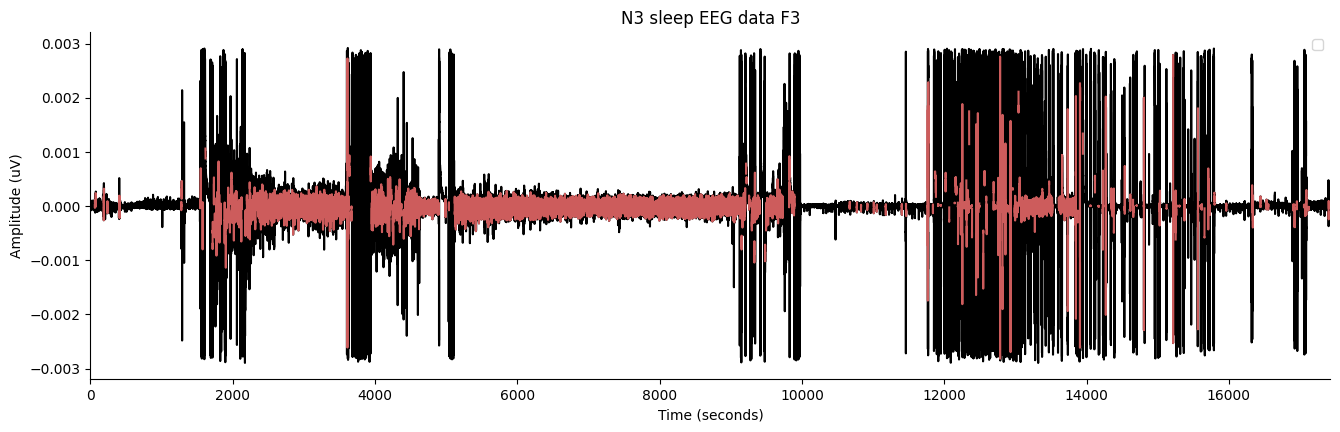

In [ ]:
sw_highlight = data * mask
sw_highlight[sw_highlight == 0] = np.nan

data_channel_1 = data[0]
data_channel_1_flattened = data_channel_1.ravel()

sw_highlight = np.squeeze(sw_highlight)

plt.figure(figsize=(16, 4.5))

plt.plot(times, data_channel_1_flattened, 'k')
plt.plot(times, sw_highlight, 'indianred')

plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.xlim([0, times[-1]])
plt.title('N3 sleep EEG data F3')
plt.legend()
sns.despine()